# Unsupervised Learning:

# K-Means Clustering:

In [1]:
#Equilidal distance: d = rootover of (x2-x1)**2+(y2-y1)**2

In [2]:
#new centroid = mean of both points in a respective cluster

In [3]:
#After each two points new centroid needs to be created

In [4]:
#Here we predictede the value of K due to less data

In [5]:
#Inorder to predict the exact value of K we need to know Elbow method first

In [6]:
#More the cluster less the WCCS(K) value

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

In [8]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.shape

(200, 5)

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# column rename:

In [11]:
df.rename(columns={'Gender':'gender',"Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace = True)

In [12]:
df

,CustomerID,gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.describe()

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


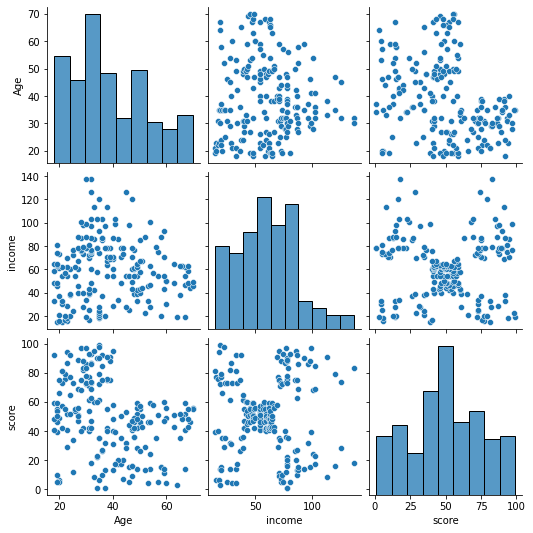

In [14]:
seaborn .pairplot(df[["Age","income","score"]])

<AxesSubplot:ylabel='Count'>

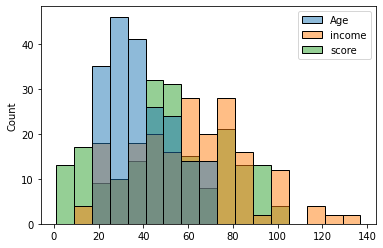

In [15]:
seaborn.histplot(df[["Age","income","score"]])

# Now Applying Kmeans clustering algorithm:

In [16]:
import sklearn.cluster as cluster

In [17]:
kmeans = cluster.KMeans(n_clusters=5)

In [18]:
kmeans = kmeans.fit(df[["score","income"]])

# To find the centroids:

In [19]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

# To determine which center value belongs to which cluster:

In [20]:
df["income_cluster"] = kmeans.labels_

In [21]:
df

,CustomerID,gender,Age,income,score,income_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


# To find the value of each cluster:

In [22]:
df["income_cluster"].value_counts()

1    81
0    39
2    35
4    23
3    22
Name: income_cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

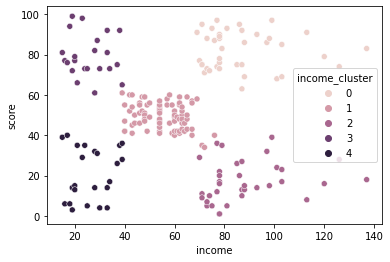

In [23]:
seaborn.scatterplot(x ="income",y ="score",hue = "income_cluster",data = df)

In [24]:
kmeans = cluster.KMeans(n_clusters=2)

In [25]:
kmeans = kmeans.fit(df[["Age","score"]])

In [26]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [27]:
df["Age_cluster"] = kmeans.labels_

In [28]:
df

,CustomerID,gender,Age,income,score,income_cluster,Age_cluster
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,2,1


In [29]:
df["Age_cluster"].value_counts()

1    115
0     85
Name: Age_cluster, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='score'>

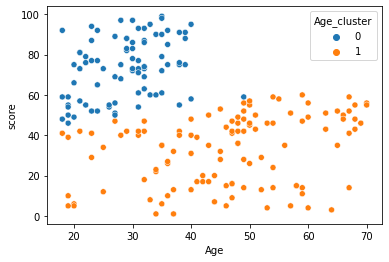

In [30]:
seaborn.scatterplot(x ="Age",y ="score",hue = "Age_cluster",data = df)

# Elbow Method:

In [31]:
#At first we taken the value of K by ourselves through pairplot but now to determine the exact value of sum od squared error
#we will use Elbow Method

In [32]:
from sklearn.cluster import KMeans

In [33]:
k_range = range(1,12)

In [34]:
wcss = []

In [37]:
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(df[["income","score"]])
    wcss.append(km.inertia_)

In [38]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30273.394312070042,
 25043.89004329005,
 21850.165282585636,
 19657.783608703958,
 18040.77401933825]

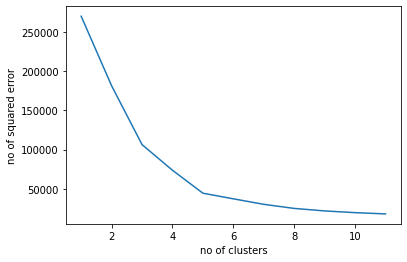

In [39]:
plt.xlabel("no of clusters")
plt.ylabel("no of squared error")
plt.plot(k_range,wcss)

In [47]:
wcss2 = []
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(df[["Age","score"]])
    wcss2.append(km.inertia_)

In [48]:
wcss2 

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23819.005673150266,
 19567.665300125827,
 15514.193134351035,
 13002.466488382794,
 11441.988242685962,
 10117.015200440715,
 9484.269434870683]

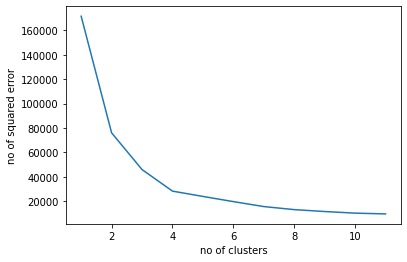

In [49]:
plt.xlabel("no of clusters")
plt.ylabel("no of squared error")
plt.plot(k_range,wcss2)